<a href="https://colab.research.google.com/github/Mr-RAKSHIT-2004-GUPTA/Unsupervised-Learning/blob/main/Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000 , centers = 3,n_features=2 , random_state=1)

In [ ]:
# usl >> we will not using y
X

array([[-3.05837272,  4.48825769],
       [-8.60973869, -3.72714879],
       [ 1.37129721,  5.23107449],
       ...,
       [-1.91854276,  4.59578307],
       [-1.79600465,  4.28743568],
       [-6.97684609, -8.89498834]])

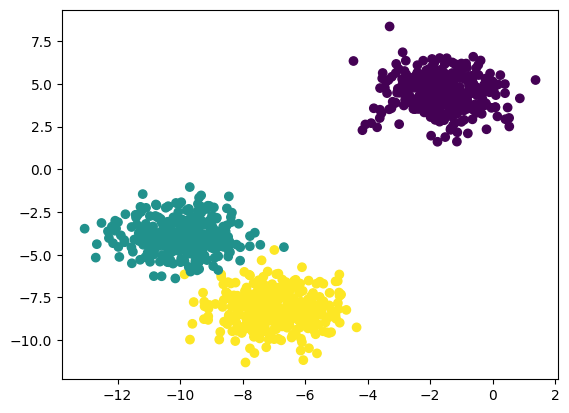

In [ ]:
plt.scatter(X[: , 0] , X[: , 1] , c=y )
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=1)

In [ ]:
X_train.shape , y_train.shape

((700, 2), (700,))

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)


KMeans(n_clusters=3)

In [ ]:
y_labels = kmeans.predict(X_train)

In [ ]:
y_labels

array([1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1,
       0, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 2,
       2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0,
       1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0,
       1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 1,

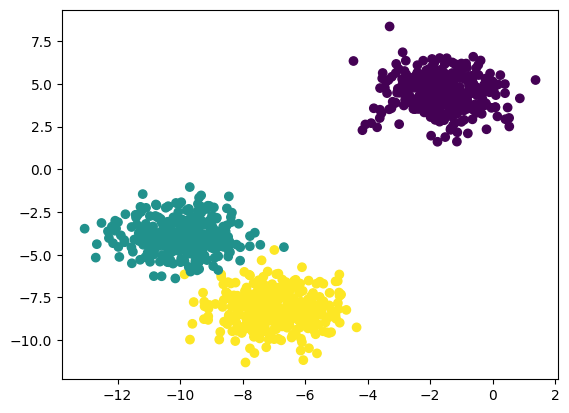

In [ ]:
plt.scatter(X[: , 0] , X[: , 1] , c=y )
plt.show()

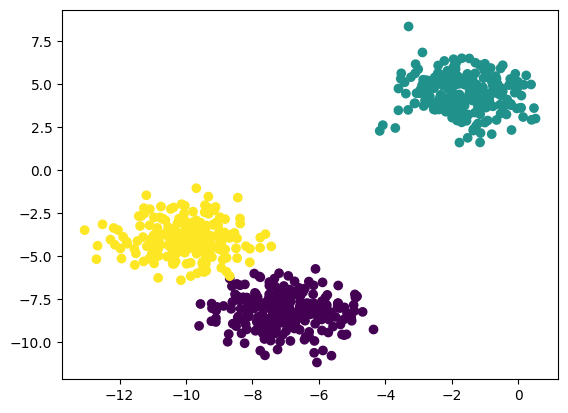

In [ ]:
plt.scatter(X_train[: , 0] , X_train[: , 1] , c=y_labels )
plt.show()

In [ ]:
#how better this clsutering model is
from sklearn.metrics import silhouette_score
silhouette_score(X_train , kmeans.labels_)

0.7179451230427786

In [ ]:
#how to select k >> elbow method
WCSS = []
for k in range(10):
  kmeans = KMeans(n_clusters=k+1)
  kmeans.fit(X_train)
  WCSS.append(kmeans.inertia_)

In [ ]:
WCSS

[29004.511743610456,
 4501.242392684225,
 1405.7366590440085,
 1272.5520500414177,
 1084.716671589556,
 946.2709672560544,
 805.9092643522956,
 707.1950205037816,
 666.5472282803642,
 575.6328780585698]

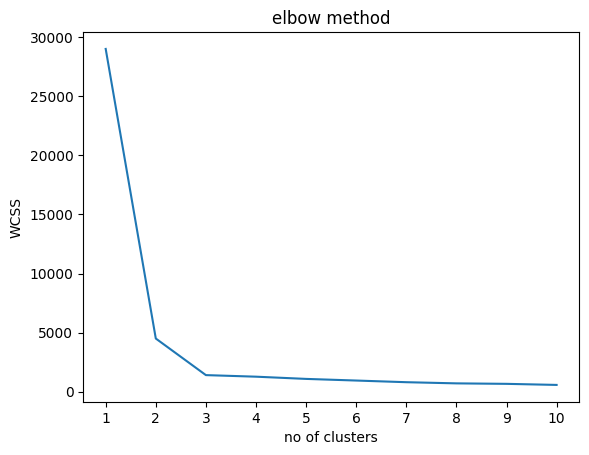

In [ ]:
plt.plot(range(1,11) , WCSS)
plt.xticks(range(1,11))
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.title("elbow method")
plt.show()

In [ ]:
#based on the plot above the optimal no of k/centroid should be

In [ ]:
# pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
k1 = KneeLocator(range(1,11),WCSS , curve = 'convex' , direction='decreasing')

In [ ]:
k1

In [ ]:
k1.elbow

2

In [ ]:
silhouette_coeff = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k+1)
  kmeans.fit(X_train)
  silhouette_coeff.append(silhouette_score(X_train , kmeans.labels_))

In [ ]:
silhouette_coeff

[0.7179451230427786,
 0.5661029394733321,
 0.5828687739506577,
 0.4940007928552786,
 0.3139006667781077,
 0.31402645470261337,
 0.3297481677116239,
 0.34111515496809774,
 0.3342183759276726]

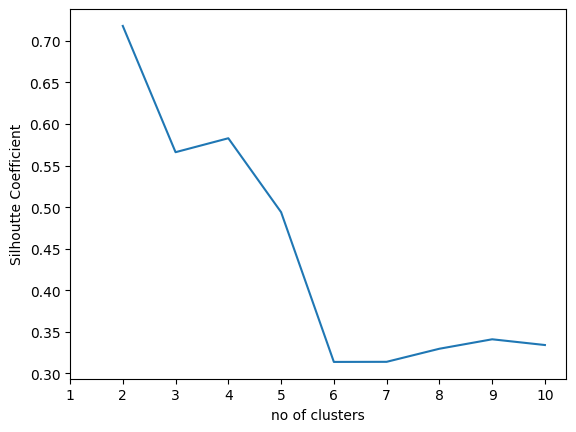

In [ ]:
plt.plot(range(2,11) , silhouette_coeff)
plt.xticks(range(1,11))
plt.xlabel("no of clusters")
plt.ylabel("Silhoutte Coefficient")
plt.show()

In [ ]:
#we verified the wcss and silhoutte scoe both gave k = 2.